In [ ]:
%pip install --upgrade cloudpickle

Python interpreter will be restarted.
Requirement already up-to-date: cloudpickle in /local_disk0/.ephemeral_nfs/envs/pythonEnv-6031592d-6784-46ec-8e45-280c9e58988b/lib/python3.7/site-packages (2.1.0)
WARNING: You are using pip version 20.0.2; however, version 22.2.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-6031592d-6784-46ec-8e45-280c9e58988b/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [ ]:
%pip install "mlflow>=1.25.0"

In [ ]:
%pip install hyperopt
%pip install xgboost

In [ ]:
import pandas as pd

white_wine = pd.read_csv("/dbfs/FileStore/winequality_white-1.csv",sep=';')
red_wine = pd.read_csv("/dbfs/FileStore/winequality_red-1.csv",sep=';')


In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Merge the two DataFrames into a single dataset, with a new binary feature "is_red" that indicates whether the wine is red or white.

red_wine['is_red'] = 1
white_wine['is_red'] = 0
 
data = pd.concat([red_wine, white_wine], axis=0)
 
# Remove spaces from column names
data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 fixed_acidity 6497 non-null float64
 1 volatile_acidity 6497 non-null float64
 2 citric_acid 6497 non-null float64
 3 residual_sugar 6497 non-null float64
 4 chlorides 6497 non-null float64
 5 free_sulfur_dioxide 6497 non-null float64
 6 total_sulfur_dioxide 6497 non-null float64
 7 density 6497 non-null float64
 8 pH 6497 non-null float64
 9 sulphates 6497 non-null float64
 10 alcohol 6497 non-null float64
 11 quality 6497 non-null int64 
 12 is_red 6497 non-null int64 
dtypes: float64(11), int64(2)
memory usage: 710.6 KB

In [ ]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


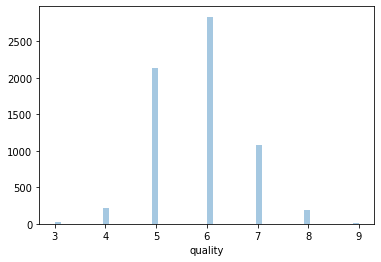

In [ ]:
#Plot a histogram of the dependent variable, quality.

import seaborn as sns
sns.distplot(data.quality, kde=False)

In [ ]:
#Define a wine as high quality if it has quality >= 7.

high_quality = (data.quality >= 7).astype(int)
data.quality = high_quality

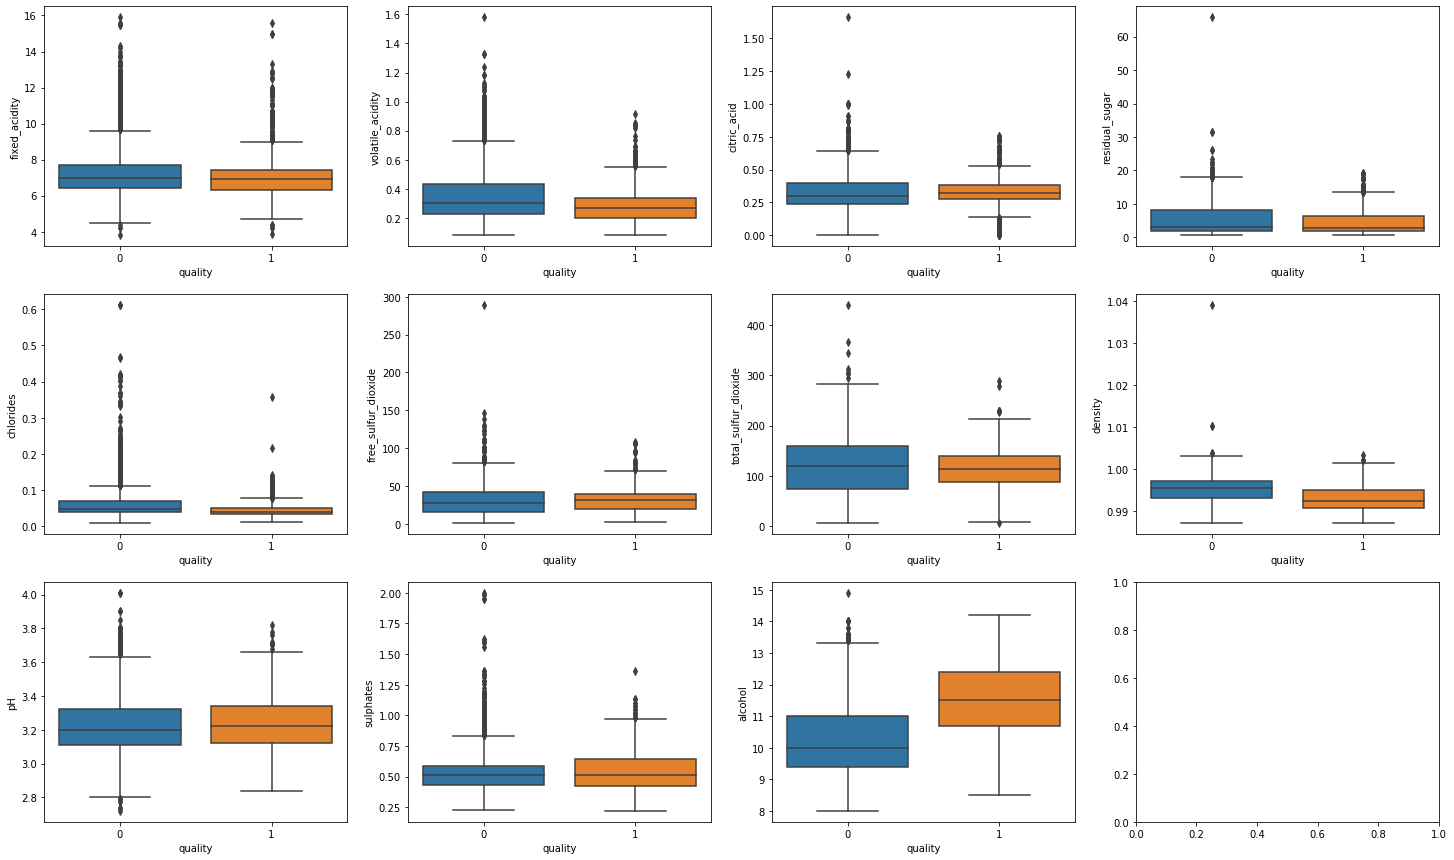

In [ ]:
#Box plots are useful in noticing correlations between features and a binary label.
import matplotlib.pyplot as plt
 
dims = (3, 4)
 
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in data.columns:
  if col == 'is_red' or col == 'quality':
    continue # Box plots cannot be used on indicator variables
  sns.boxplot(x=high_quality, y=data[col], ax=axes[axis_i, axis_j])
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

In [ ]:
#Prior to training a model, check for missing values and split the data into training and validation sets.
data.isna().any()

Out[9]: fixed_acidity False
volatile_acidity False
citric_acid False
residual_sugar False
chlorides False
free_sulfur_dioxide False
total_sulfur_dioxide False
density False
pH False
sulphates False
alcohol False
quality False
is_red False
dtype: bool

In [ ]:
#Split the input data into 3 sets:
#Train (60% of the dataset used to train the model)
#Validation (20% of the dataset used to tune the hyperparameters)
#Test (20% of the dataset used to report the true performance of the model on an unseen dataset)


from sklearn.model_selection import train_test_split
 
X = data.drop(["quality"], axis=1)
y = data.quality
 
# Split out the training data
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=123)
 
# Split the remaining data equally into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=123)

In [ ]:
#This task seems well suited to a random forest classifier, since the output is binary and there may be interactions between multiple variables.
#The following code builds a simple classifier using scikit-learn. It uses MLflow to keep track of the model accuracy, and to save the model for later use.

import mlflow
import mlflow.pyfunc
import mlflow.sklearn
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlflow.models.signature import infer_signature
from mlflow.utils.environment import _mlflow_conda_env
import cloudpickle
import time
 
# The predict method of sklearn's RandomForestClassifier returns a binary classification (0 or 1). 
# The following code creates a wrapper function, SklearnModelWrapper, that uses 
# the predict_proba method to return the probability that the observation belongs to each class. 
 
class SklearnModelWrapper(mlflow.pyfunc.PythonModel):
  def __init__(self, model):
    self.model = model
    
  def predict(self, context, model_input):
    return self.model.predict_proba(model_input)[:,1]
 
# mlflow.start_run creates a new MLflow run to track the performance of this model. 
# Within the context, you call mlflow.log_param to keep track of the parameters used, and
# mlflow.log_metric to record metrics like accuracy.
with mlflow.start_run(run_name='untuned_random_forest'):
  n_estimators = 10
  model = RandomForestClassifier(n_estimators=n_estimators, random_state=np.random.RandomState(123))
  model.fit(X_train, y_train)
 
  # predict_proba returns [prob_negative, prob_positive], so slice the output with [:, 1]
  predictions_test = model.predict_proba(X_test)[:,1]
  auc_score = roc_auc_score(y_test, predictions_test)
  mlflow.log_param('n_estimators', n_estimators)
  # Use the area under the ROC curve as a metric.
  mlflow.log_metric('auc', auc_score)
  wrappedModel = SklearnModelWrapper(model)
  # Log the model with a signature that defines the schema of the model's inputs and outputs. 
  # When the model is deployed, this signature will be used to validate inputs.
  signature = infer_signature(X_train, wrappedModel.predict(None, X_train))
  
  # MLflow contains utilities to create a conda environment used to serve models.
  # The necessary dependencies are added to a conda.yaml file which is logged along with the model.
  conda_env =  _mlflow_conda_env(
        additional_conda_deps=None,
        additional_pip_deps=["cloudpickle=={}".format(cloudpickle.__version__), "scikit-learn=={}".format(sklearn.__version__)],
        additional_conda_channels=None,
    )
  mlflow.pyfunc.log_model("random_forest_model", python_model=wrappedModel, conda_env=conda_env, signature=signature)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-6031592d-6784-46ec-8e45-280c9e58988b/lib/python3.7/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
 inputs = _infer_schema(model_input)

In [ ]:
#Examine the learned feature importances output by the model as a sanity-check.
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns.tolist(), columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

,importance
alcohol,0.160192
density,0.117415
volatile_acidity,0.093136
chlorides,0.086618
residual_sugar,0.082544
free_sulfur_dioxide,0.080473
pH,0.080212
total_sulfur_dioxide,0.077798
sulphates,0.075780
citric_acid,0.071857


In [ ]:
#Register the model in MLflow Model Registry
#By registering this model in Model Registry, you can easily reference the model from anywhere within Databricks.
run_id = mlflow.search_runs(filter_string='tags.mlflow.runName = "untuned_random_forest"').iloc[0].run_id

model_name = "wine_quality"
model_version = mlflow.register_model(f"runs:/{run_id}/random_forest_model", model_name)
 
# Registering the model takes a few seconds, so add a small delay
time.sleep(15)

Registered model 'wine_quality' already exists. Creating a new version of this model...
2022/07/28 00:44:48 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: wine_quality, version 3
Created version '3' of model 'wine_quality'.

In [ ]:
from mlflow.tracking import MlflowClient
 
client = MlflowClient()
client.transition_model_version_stage(
  name=model_name,
  version=model_version.version,
  stage="Production",
)

Out[14]: <ModelVersion: creation_timestamp=1658969088904, current_stage='Production', description='', last_updated_timestamp=1658969110291, name='wine_quality', run_id='168c9623bcfe40adba4ae05deaf7ba73', run_link='', source='dbfs:/databricks/mlflow-tracking/2332135455395844/168c9623bcfe40adba4ae05deaf7ba73/artifacts/random_forest_model', status='READY', status_message='', tags={}, user_id='5600189469838616', version='3'>

In [ ]:
#You can now refer to the model using the path "models:/wine_quality/production".

model = mlflow.pyfunc.load_model(f"models:/{model_name}/production")
 
# Sanity-check: This should match the AUC logged by MLflow
print(f'AUC: {roc_auc_score(y_test, model.predict(X_test))}')

AUC: 0.8540300975814177

In [ ]:
import mlflow.xgboost

In [ ]:
import xgboost as xgb

In [ ]:
#The following code uses the xgboost library to train a more accurate model. It runs a parallel hyperparameter sweep to train multiple models in parallel, using Hyperopt and SparkTrials. As before, the code tracks the performance of each parameter configuration with MLflow.

from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
from hyperopt.pyll import scope
from math import exp
import mlflow.xgboost
import numpy as np
import xgboost as xgb
 
search_space = {
  'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
  'learning_rate': hp.loguniform('learning_rate', -3, 0),
  'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
  'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
  'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
  'objective': 'binary:logistic',
  'seed': 123, # Set a seed for deterministic training
}
 
def train_model(params):
  # With MLflow autologging, hyperparameters and the trained model are automatically logged to MLflow.
  mlflow.xgboost.autolog()
  with mlflow.start_run(nested=True):
    train = xgb.DMatrix(data=X_train, label=y_train)
    validation = xgb.DMatrix(data=X_val, label=y_val)
    # Pass in the validation set so xgb can track an evaluation metric. XGBoost terminates training when the evaluation metric
    # is no longer improving.
    booster = xgb.train(params=params, dtrain=train, num_boost_round=1000,\
                        evals=[(validation, "validation")], early_stopping_rounds=50)
    validation_predictions = booster.predict(validation)
    auc_score = roc_auc_score(y_val, validation_predictions)
    mlflow.log_metric('auc', auc_score)
 
    signature = infer_signature(X_train, booster.predict(train))
    mlflow.xgboost.log_model(booster, "model", signature=signature)
    
    # Set the loss to -1*auc_score so fmin maximizes the auc_score
    return {'status': STATUS_OK, 'loss': -1*auc_score, 'booster': booster.attributes()}
 
# Greater parallelism will lead to speedups, but a less optimal hyperparameter sweep. 
# A reasonable value for parallelism is the square root of max_evals.
spark_trials = SparkTrials(parallelism=10)
 
# Run fmin within an MLflow run context so that each hyperparameter configuration is logged as a child run of a parent
# run called "xgboost_models" .
with mlflow.start_run(run_name='xgboost_models'):
  best_params = fmin(
    fn=train_model, 
    space=search_space, 
    algo=tpe.suggest, 
    max_evals=96,
    trials=spark_trials,
  )

0%| | 0/96 [00:00<?, ?trial/s, best loss=?] 1%| | 1/96 [00:54<1:25:42, 54.13s/trial, best loss: -0.8785309647326858] 2%|▏ | 2/96 [00:56<36:46, 23.47s/trial, best loss: -0.8785309647326858]  3%|▎ | 3/96 [01:01<23:18, 15.04s/trial, best loss: -0.8785309647326858] 4%|▍ | 4/96 [01:05<16:23, 10.68s/trial, best loss: -0.8907459860531703] 5%|▌ | 5/96 [01:19<18:01, 11.89s/trial, best loss: -0.8907459860531703] 6%|▋ | 6/96 [01:25<14:50, 9.89s/trial, best loss: -0.8964224688659349] 8%|▊ | 8/96 [01:33<10:15, 6.99s/trial, best loss: -0.8964224688659349] 9%|▉ | 9/96 [01:37<09:00, 6.22s/trial, best loss: -0.8964224688659349] 10%|█ | 10/96 [01:39<07:16, 5.08s/trial, best loss: -0.8964224688659349] 11%|█▏ | 11/96 [01:46<07:57, 5.62s/trial, best loss: -0.8964224688659349] 12%|█▎ | 12/96 [01:52<08:01, 5.73s/trial, best loss: -0.8964224688659349] 14%|█▎ | 13/96 [01:56<07:14, 5.24s/trial, best loss: -0.8964224688659349] 15%|█▍ | 14/96 [02:03<07:52, 5.76s/trial, best loss: -0.8964224688659349] 16%|█▌ | 15/96 [02:25<14:15, 10.56s/trial, best loss: -0.8964224688659349] 18%|█▊ | 17/96 [02:32<09:39, 7.34s/trial, best loss: -0.8964224688659349] 19%|█▉ | 18/96 [02:49<12:38, 9.73s/trial, best loss: -0.8969766475269777] 20%|█▉ | 19/96 [02:52<10:14, 7.99s/trial, best loss: -0.8969766475269777] 21%|██ | 20/96 [02:57<09:05, 7.18s/trial, best loss: -0.8969766475269777] 22%|██▏ | 21/96 [03:01<07:52, 6.30s/trial, best loss: -0.8969766475269777] 23%|██▎ | 22/96 [03:10<08:43, 7.08s/trial, best loss: -0.8969766475269777] 24%|██▍ | 23/96 [03:56<22:20, 18.36s/trial, best loss: -0.8995474207601484] 25%|██▌ | 24/96 [03:57<15:56, 13.28s/trial, best loss: -0.8995474207601484] 26%|██▌ | 25/96 [04:08<14:56, 12.63s/trial, best loss: -0.8995474207601484] 27%|██▋ | 26/96 [04:13<12:06, 10.37s/trial, best loss: -0.8995474207601484] 29%|██▉ | 28/96 [04:16<07:09, 6.31s/trial, best loss: -0.8995474207601484] 30%|███ | 29/96 [04:18<05:52, 5.26s/trial, best loss: -0.8995474207601484] 32%|███▏ | 31/96 [04:23<04:28, 4.13s/trial, best loss: -0.8995474207601484] 33%|███▎ | 32/96 [04:25<03:53, 3.65s/trial, best loss: -0.8995474207601484] 34%|███▍ | 33/96 [04:31<04:26, 4.24s/trial, best loss: -0.8995474207601484] 35%|███▌ | 34/96 [04:35<04:19, 4.18s/trial, best loss: -0.8995474207601484] 36%|███▋ | 35/96 [04:39<04:12, 4.14s/trial, best loss: -0.8995474207601484] 38%|███▊ | 36/96 [04:40<03:16, 3.27s/trial, best loss: -0.8995474207601484] 39%|███▊ | 37/96 [04:43<03:08, 3.20s/trial, best loss: -0.8995474207601484] 40%|███▉ | 38/96 [04:45<02:45, 2.86s/trial, best loss: -0.8995474207601484] 41%|████ | 39/96 [04:46<02:12, 2.32s/trial, best loss: -0.8995474207601484] 42%|████▏ | 40/96 [04:51<02:38, 2.83s/trial, best loss: -0.8995474207601484] 43%|████▎ | 41/96 [04:52<02:06, 2.29s/trial, best loss: -0.8995474207601484] 45%|████▍ | 43/96 [04:53<01:18, 1.47s/trial, best loss: -0.8995474207601484] 46%|████▌ | 44/96 [04:57<01:49, 2.11s/trial, best loss: -0.8995474207601484] 47%|████▋ | 45/96 [04:58<01:32, 1.82s/trial, best loss: -0.8995474207601484] 48%|████▊ | 46/96 [04:59<01:20, 1.61s/trial, best loss: -0.8995474207601484] 49%|████▉ | 47/96 [05:03<01:52, 2.29s/trial, best loss: -0.8995474207601484] 50%|█████ | 48/96 [05:04<01:32, 1.92s/trial, best loss: -0.8995474207601484] 51%|█████ | 49/96 [05:07<01:45, 2.25s/trial, best loss: -0.8995474207601484] 52%|█████▏ | 50/96 [05:08<01:27, 1.89s/trial, best loss: -0.8995474207601484] 53%|█████▎ | 51/96 [05:09<01:13, 1.64s/trial, best loss: -0.8995474207601484] 54%|█████▍ | 52/96 [05:12<01:30, 2.05s/trial, best loss: -0.8995474207601484] 55%|█████▌ | 53/96 [05:13<01:15, 1.75s/trial, best loss: -0.8995474207601484] 56%|█████▋ | 54/96 [05:16<01:29, 2.13s/trial, best loss: -0.8995474207601484] 57%|█████▋ | 55/96 [05:21<02:02, 2.99s/trial, best loss: -0.8995474207601484] 60%|██████ | 58/96 [05:24<01:11, 1.88s/trial, best loss: -0.8995474207601484] 61%|██████▏ | 59/96 [05:27<01:18, 2.13s/trial, best loss: -0.8

In [ ]:
#The following code finds the best performing run and saves the model to Model Registry.
best_run = mlflow.search_runs(order_by=['metrics.auc DESC']).iloc[0]
print(f'AUC of Best Run: {best_run["metrics.auc"]}')

AUC of Best Run: 0.8995474207601484

In [ ]:
#Now that we have a created a more accurate model, update wine_quality.

new_model_version = mlflow.register_model(f"runs:/{best_run.run_id}/model", model_name)
 
# Registering the model takes a few seconds, so add a small delay
time.sleep(15)

Registered model 'wine_quality' already exists. Creating a new version of this model...
2022/07/28 00:57:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: wine_quality, version 4
Created version '4' of model 'wine_quality'.

In [ ]:
# Archive the old model version
client.transition_model_version_stage(
  name=model_name,
  version=model_version.version,
  stage="Archived"
)
 
# Promote the new model version to Production
client.transition_model_version_stage(
  name=model_name,
  version=new_model_version.version,
  stage="Production"
)

Out[21]: <ModelVersion: creation_timestamp=1658969858731, current_stage='Production', description='', last_updated_timestamp=1658969880229, name='wine_quality', run_id='26686209752b44da8979c4bb06f5cec9', run_link='', source='dbfs:/databricks/mlflow-tracking/2332135455395844/26686209752b44da8979c4bb06f5cec9/artifacts/model', status='READY', status_message='', tags={}, user_id='5600189469838616', version='4'>

In [ ]:
#Clients that call load_model now receive the new model.

# This code is the same as the last block of "Building a Baseline Model". No change is required for clients to get the new model!
model = mlflow.pyfunc.load_model(f"models:/{model_name}/production")
print(f'AUC: {roc_auc_score(y_test, model.predict(X_test))}')

AUC: 0.9057972641283525

In [ ]:
#BATCH INFERENCE: The following code evaluates the model on data stored in a Delta table, using Spark to run the computation in parallel.

# To simulate a new corpus of data, save the existing X_train data to a Delta table. 
# In the real world, this would be a new batch of data.
spark_df = spark.createDataFrame(X_train)


In [ ]:
# Replace <username> with your username before running this cell.
table_path = "dbfs:/<es@dimensionanalytics.com.au>/delta/wine_data"
# Delete the contents of this path in case this cell has already been run
dbutils.fs.rm(table_path, True)
spark_df.write.format("delta").save(table_path)

In [ ]:
#Load the model into a Spark UDF, so it can be applied to the Delta table.

import mlflow.pyfunc
 
apply_model_udf = mlflow.pyfunc.spark_udf(spark, f"models:/{model_name}/production")

2022/07/28 01:03:07 WARNING mlflow.pyfunc: Calling `spark_udf()` with `env_manager="local"` does not recreate the same environment that was used during training, which may lead to errors or inaccurate predictions. We recommend specifying `env_manager="conda"`, which automatically recreates the environment that was used to train the model and performs inference in the recreated environment.

In [ ]:
# Read the "new data" from Delta
new_data = spark.read.format("delta").load(table_path)

In [ ]:

from pyspark.sql.functions import struct
 
# Apply the model to the new data
udf_inputs = struct(*(X_train.columns.tolist()))
 
new_data = new_data.withColumn(
  "prediction",
  apply_model_udf(udf_inputs)
)

In [ ]:

# Each row now has an associated prediction. Note that the xgboost function does not output probabilities by default, so the predictions are not limited to the range [0, 1].
display(new_data)

In [ ]:
#The following code illustrates how to issue requests using a REST API to get predictions from the deployed model.
#You need a Databricks token to issue requests to your model endpoint. You can generate a token from the User Settings page (click Settings in the left sidebar). Copy the token into the next cell.


In [ ]:
import os
os.environ["DATABRICKS_TOKEN"] = "<X"

In [ ]:
import os
import requests
import numpy as np
import pandas as pd

def create_tf_serving_json(data):
  return {'inputs': {name: data[name].tolist() for name in data.keys()} if isinstance(data, dict) else data.tolist()}

def score_model(dataset):
  url = 'https://dbc-c7de319e-b999.cloud.databricks.com/model/wine_quality/4/invocations'
  headers = {'Authorization': f'Bearer {os.environ.get("X")}'}
  data_json = dataset.to_dict(orient='split') if isinstance(dataset, pd.DataFrame) else create_tf_serving_json(dataset)
  response = requests.request(method='POST', headers=headers, url=url, json=data_json)
  if response.status_code != 200:
    raise Exception(f'Request failed with status {response.status_code}, {response.text}')
  return response.json()

In [ ]:

# Model serving is designed for low-latency predictions on smaller batches of data
num_predictions = 5
served_predictions = score_model(X_test[:num_predictions])
model_evaluations = model.predict(X_test[:num_predictions])
# Compare the results from the deployed model and the trained model
pd.DataFrame({
  "Model Prediction": model_evaluations,
  "Served Model Prediction": served_predictions,
})

--------------------------------------------------------------------------- 
 Exception Traceback (most recent call last)
 <command-2332135455395881> in <module> 
 1 # Model serving is designed for low-latency predictions on smaller batches of data 
 2 num_predictions = 5 
 ----> 3 served_predictions = score_model ( X_test [ : num_predictions ] ) 
 4 model_evaluations = model . predict ( X_test [ : num_predictions ] ) 
 5 # Compare the results from the deployed model and the trained model 

 <command-2332135455395880> in score_model (dataset) 
 13 response = requests . request ( method = 'POST' , headers = headers , url = url , json = data_json ) 
 14 if response . status_code != 200 : 
 ---> 15 raise Exception ( f'Request failed with status {response.status_code}, {response.text}' ) 
 16 return response . json ( ) 

 Exception : Request failed with status 403, <html>
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8"/>
<title>Error 403 Invalid access token.</title>
</head>
<body><h2>HTTP ERROR 403</h2>
<p>Problem accessing /model/wine_quality/4/invocations. Reason:
<pre> Invalid access token.</pre></p>
</body>
</html>